# Lab 1
Nathan Ansel, Shania Tirkey

In [1]:
import monkdata as m
from dtree import *

### Assignment 0

### Assignment 1

In [2]:
from dtree import entropy

In [3]:
print(entropy(m.monk1))
print(entropy(m.monk2))
print(entropy(m.monk3))

1.0
0.957117428264771
0.9998061328047111


### Assignment 2

A uniform distribution will have higher entropy as compared to a non-uniform distribution. A non-uniform distribution will have peaks or modes; it will have a range of values which are more likely to appear than other values, which reduces the overall uncertainty. This is very similar to the entropy of a real die and a fake die. A real die follows a discrete uniform distribution whereas a fake die follows a non-uniform distribution, and a real die has a higher entropy.

We can observe the following distributions and their entropies.

In [4]:
from tools import calculate_entropy, generate_samples

In [5]:
uniform_samples = [
    generate_samples('uniform', x) for x in range(10, 2500, 10)
]
uniform_entropy = [
    calculate_entropy(samples) for samples in uniform_samples
]

# for entropy in uniform_entropy:
#     print(entropy)

In [6]:
non_uniform_samples = [
    generate_samples('non_uniform', x) for x in range(10, 2500, 10)
]
non_uniform_entropy = [
    calculate_entropy(samples) for samples in non_uniform_samples
]

# for entropy in non_uniform_entropy:
#     print(entropy)

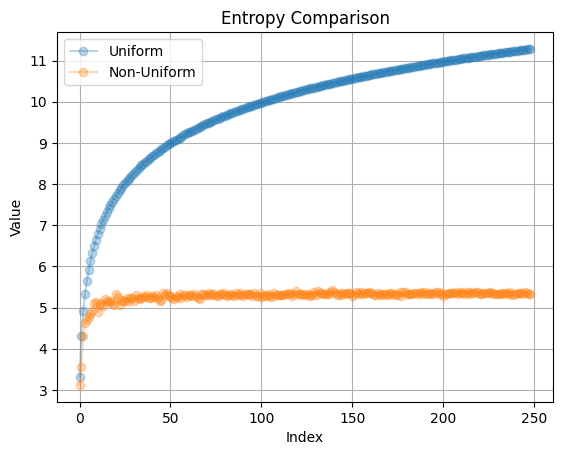

In [7]:
import matplotlib.pyplot as plt

plt.plot(uniform_entropy, label='Uniform', marker='o', alpha=0.3)
plt.plot(non_uniform_entropy, label='Non-Uniform', marker='o', alpha=0.3)

plt.title('Entropy Comparison')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()


In [8]:
import numpy as np 

non_uniform = [round(num) for num in np.random.normal(0, 10, 10**5)]
uniform = range(0, 10**5)

print(f"Non uniform: {calculate_entropy(non_uniform)}")
print(f"Uniform: {calculate_entropy(uniform)}")

Non uniform: 5.368501859172486
Uniform: 16.60964047441802


### Assignment 3

The following attributes have the largest information gain for each dataset and should therefore be used to split the tree at the root node: 

Monk-1: A5 \
Monk-2: A5 \
Monk-3: A2

In [9]:
from dtree import averageGain

In [10]:
for i, monk in enumerate([m.monk1, m.monk2, m.monk3]):
    print(f"Monk {i+1}")
    for attribute in m.attributes:
        print(f"   {repr(attribute)}: {averageGain(monk, attribute):.5f}")

Monk 1
   A1: 0.07527
   A2: 0.00584
   A3: 0.00471
   A4: 0.02631
   A5: 0.28703
   A6: 0.00076
Monk 2
   A1: 0.00376
   A2: 0.00246
   A3: 0.00106
   A4: 0.01566
   A5: 0.01728
   A6: 0.00625
Monk 3
   A1: 0.00712
   A2: 0.29374
   A3: 0.00083
   A4: 0.00289
   A5: 0.25591
   A6: 0.00708


In [11]:
from dtree import bestAttribute

print("The best attribute for each dataset")
for i, monk in enumerate([m.monk1, m.monk2, m.monk3]):
    print(f"Monk {i+1}: {bestAttribute(monk, m.attributes)}")

The best attribute for each dataset
Monk 1: A5
Monk 2: A5
Monk 3: A2


### Assignment 4

Based on the equation, it is clear that the entropy of the subsets must be reduced/minimised when the information gain is maximised. Therefore, when choosing an attribute to split the root node, we should choose one which results in the greatest possible reduction to the entropy of the subsets. With entropy being reduced, there is less uncertainty and we will be able to make more certain predictions. 

### Assignment 5

In [12]:
monk1_split1 = [
    select(m.monk1, m.attributes[3], 1), 
    select(m.monk1, m.attributes[3], 2), 
    select(m.monk1, m.attributes[3], 3)
]

monk2_split1 = [
    select(m.monk2, m.attributes[4], 1), 
    select(m.monk2, m.attributes[4], 2), 
    select(m.monk2, m.attributes[4], 3),
    select(m.monk2, m.attributes[4], 4)
]

monk3_split1 = [
    select(m.monk3, m.attributes[1], 1), 
    select(m.monk3, m.attributes[1], 2), 
    select(m.monk3, m.attributes[1], 3)
]

For Monk-1, A5=2 scores the highest information gain for root node splitting. \
For Monk-2, A3=1 scores the highest information gain for root node splitting. \
For Monk-3, A5=1 scores the highest information gain for root node splitting.

In [13]:
for i, monk in enumerate([monk1_split1, monk2_split1, monk3_split1]):
    print(f"Monk {i+1}")
    for j, sub_monk in enumerate(monk):
        print(f"Attribute = {j+1}")
        for attribute in m.attributes: 
            print(f"   {repr(attribute)}: {averageGain(sub_monk, attribute):.5f}")

Monk 1
Attribute = 1
   A1: 0.08512
   A2: 0.00901
   A3: 0.00000
   A4: 0.00000
   A5: 0.22566
   A6: 0.02797
Attribute = 2
   A1: 0.03989
   A2: 0.00330
   A3: 0.00690
   A4: 0.00000
   A5: 0.41660
   A6: 0.00935
Attribute = 3
   A1: 0.08383
   A2: 0.00889
   A3: 0.01970
   A4: 0.00000
   A5: 0.26222
   A6: 0.03501
Monk 2
Attribute = 1
   A1: 0.04569
   A2: 0.07852
   A3: 0.18019
   A4: 0.14013
   A5: 0.00000
   A6: 0.00476
Attribute = 2
   A1: 0.00259
   A2: 0.03247
   A3: 0.04569
   A4: 0.02584
   A5: 0.00000
   A6: 0.00730
Attribute = 3
   A1: 0.00093
   A2: 0.01018
   A3: 0.03332
   A4: 0.00204
   A5: 0.00000
   A6: 0.00430
Attribute = 4
   A1: 0.00220
   A2: 0.04955
   A3: 0.01580
   A4: 0.00304
   A5: 0.00000
   A6: 0.00425
Monk 3
Attribute = 1
   A1: 0.00148
   A2: -0.00000
   A3: 0.00098
   A4: 0.05006
   A5: 0.81829
   A6: 0.00096
Attribute = 2
   A1: 0.05073
   A2: 0.00000
   A3: 0.03450
   A4: 0.02104
   A5: 0.47671
   A6: 0.02651
Attribute = 3
   A1: 0.04885
   A2: 0.0000

In [14]:
monk1_split1_pos = select(m.monk1, m.attributes[4], 2)
monk1_split1_neg = (
    select(m.monk1, m.attributes[4], 1) +
    select(m.monk1, m.attributes[4], 3) + 
    select(m.monk1, m.attributes[4], 4)
)

print(f"Most Common: {mostCommon(monk1_split1_pos)}")
print(f"Most Common: {mostCommon(monk1_split1_neg)}")


# print("Monk 1 where A5=2")
# for attribute in m.attributes: 
#     print(f"{repr(attribute)}: {averageGain(monk1_split1_pos, attribute):.5f}")

# print("Monk 1 where A5!=2")
# for attribute in m.attributes: 
#     print(f"{repr(attribute)}: {averageGain(monk1_split1_neg, attribute):.5f}")


# print(f"Best attribute for node where A5=2: {bestAttribute(monk1_split1_pos, m.attributes)}")
# print(f"Best attribute for node where A5!=2: {bestAttribute(monk1_split1_neg, m.attributes)}")

Most Common: False
Most Common: True


In [15]:
# print(f"Monk 1 where A5=2, A4=?")
# for i in range(3): 
#     print(f"  A4={i+1}")
#     subset = select(monk1_split1_pos, m.attributes[3], 1)
#     for attribute in m.attributes: 
#         print(f"    {repr(attribute)}: {averageGain(subset, attribute):.5f}")

In [16]:
print(buildTree(m.monk1, m.attributes, maxdepth=2))

A5(+A4(---)A6(--)A1(--+))


Building a full decision tree.

In [17]:
t1 = buildTree(m.monk1, m.attributes)
t2 = buildTree(m.monk2, m.attributes)
t3 = buildTree(m.monk3, m.attributes)

# from drawtree_qt5 import drawTree
# drawTree(t3)

In [22]:
import pandas as pd

df_results = pd.DataFrame({
    "Dataset": [
        "Monk-1", "Monk-2", "Monk-3"
    ],
    "E_train": [
        check(t1, m.monk1), check(t2, m.monk2), check(t3, m.monk3)
    ],
    "E_test": [
        check(t1, m.monk1test), check(t2, m.monk2test), check(t3, m.monk3test)
    ]
})
display(df_results)

,Dataset,E_train,E_test
0,Monk-1,1.0,0.828704
1,Monk-2,1.0,0.692130
2,Monk-3,1.0,0.944444


### Assignment 6

### Assignment 7